# Figure 1: Common databases citations per year

Rebekah H. Griesenauer1, Constantino Schillebeeckx1, Michael S. Kinch1

The citations per year for each database was extracted from the SCOPUS literature database and saved as a comma-seperated value file (csv). The citation files for each database can be accessed seperately but are called with this script. 

In [4]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

chembl_counts = pd.read_csv("chembl_pub_counts.csv", header=3).set_index('YEAR').rename(columns= {'Unnamed: 1':'ChEMBL (n=2413)'})
drugbank_counts = pd.read_csv("drugbank_pub_counts.csv", header=3).set_index('YEAR').rename(columns= {'Unnamed: 1':'DrugBank (n=5611)'})
pubchem_counts = pd.read_csv("pubchem_pub_counts.csv", header=3).set_index('YEAR').rename(columns= {'Unnamed: 1':'PubChem (n=6088)'})
crib_nme_counts = pd.read_csv("crib_nme_pub_counts.csv", header=3).set_index('YEAR').rename(columns= {'Unnamed: 1':'Crib NME (n=67)'})
withdrawn_counts = pd.read_csv("withdrawn_pub_counts.csv", header=3).set_index('YEAR').rename(columns= {'Unnamed: 1':'WITHDRAWN (n=22)'})
repodb_counts = pd.read_csv("repodb_pub_counts.csv", header=3).set_index('YEAR').rename(columns= {'Unnamed: 1':'repoDB (n=8)'})
drugcentral_counts = pd.read_csv("drugcentral_pub_counts.csv", header=3).set_index('YEAR').rename(columns= {'Unnamed: 1':'DrugCentral (n=20)'})

#all_counts_list = ['chembl_counts','drugbank_counts','pubchem_counts','crib_nme_counts','withdrawn_counts','repodb_counts','drugcentral_counts']

In [5]:
all_counts = pd.DataFrame(columns=['Count'])
all_counts['Count'] = 0
all_counts = (pd.concat((all_counts,chembl_counts,drugbank_counts,pubchem_counts,crib_nme_counts,withdrawn_counts,repodb_counts,drugcentral_counts), axis=1))
all_counts['Count'] = all_counts.sum(1,min_count = 1)
all_counts['Year']= list(range(2004, 2018))

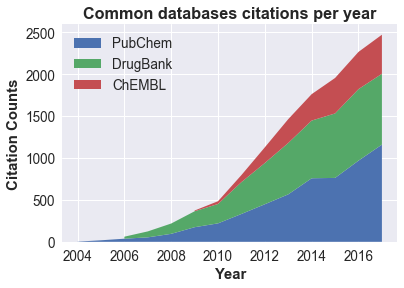

In [17]:
sns.set(font_scale=1.35)
plt.stackplot(all_counts.Year, all_counts['PubChem (n=6088)'],all_counts['DrugBank (n=5611)'], all_counts['ChEMBL (n=2413)'], labels=['PubChem','DrugBank','ChEMBL'])
plt.legend(loc='upper left')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Citation Counts',fontweight='bold')
plt.title('Common databases citations per year', fontweight='bold')
plt.savefig('citation_per_year_stacked.png',bbox_inches='tight')